

1.   DATA PREPROCESSING




1.1 Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

1.2 Import Dataset

In [2]:
import pandas as pd
dataset = pd.read_csv('/content/drive/MyDrive/Semester 5/AI/melb_data.csv')
dataset

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.79960,144.99840,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.80790,144.99340,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.80930,144.99440,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.79690,144.99690,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.80720,144.99410,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,Wheelers Hill,12 Strada Cr,4,h,1245000.0,S,Barry,26/08/2017,16.7,3150.0,...,2.0,2.0,652.0,NaN,1981.0,NaN,-37.90562,145.16761,South-Eastern Metropolitan,7392.0
13576,Williamstown,77 Merrett Dr,3,h,1031000.0,SP,Williams,26/08/2017,6.8,3016.0,...,2.0,2.0,333.0,133.0,1995.0,NaN,-37.85927,144.87904,Western Metropolitan,6380.0
13577,Williamstown,83 Power St,3,h,1170000.0,S,Raine,26/08/2017,6.8,3016.0,...,2.0,4.0,436.0,NaN,1997.0,NaN,-37.85274,144.88738,Western Metropolitan,6380.0
13578,Williamstown,96 Verdon St,4,h,2500000.0,PI,Sweeney,26/08/2017,6.8,3016.0,...,1.0,5.0,866.0,157.0,1920.0,NaN,-37.85908,144.89299,Western Metropolitan,6380.0


2.   EXPOLATORY DATA

In [3]:
dataset.shape

(13580, 21)

In [4]:
dataset.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

In [5]:
dataset.dtypes

Suburb            object
Address           object
Rooms              int64
Type              object
Price            float64
Method            object
SellerG           object
Date              object
Distance         float64
Postcode         float64
Bedroom2         float64
Bathroom         float64
Car              float64
Landsize         float64
BuildingArea     float64
YearBuilt        float64
CouncilArea       object
Lattitude        float64
Longtitude       float64
Regionname        object
Propertycount    float64
dtype: object

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

In [7]:
dataset.nunique()

Suburb             314
Address          13378
Rooms                9
Type                 3
Price             2204
Method               5
SellerG            268
Date                58
Distance           202
Postcode           198
Bedroom2            12
Bathroom             9
Car                 11
Landsize          1448
BuildingArea       602
YearBuilt          144
CouncilArea         33
Lattitude         6503
Longtitude        7063
Regionname           8
Propertycount      311
dtype: int64

2.1 Missing Value

Mari kita asumsikan nilai yang tidak diketahui sebagai nilai yang hilang karena tidak diketahui berarti tidak diketahui atau tidak ada nilai

In [8]:
dataset.isnull().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

In [9]:
dataset['Car'].dtypes

dtype('float64')

In [10]:
dataset['BuildingArea'].dtypes

dtype('float64')

In [11]:
dataset['YearBuilt'].dtypes

dtype('float64')

In [12]:
dataset['CouncilArea'].dtypes

dtype('O')

Lakukan imputer untuk menangani nilai yang hilang dalam data numerik

In [13]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values= np.nan, strategy='mean')
imputer

SimpleImputer()

In [14]:
imputer = imputer.fit(dataset[['Car', 'BuildingArea', 'YearBuilt']])
imputer

SimpleImputer()

In [15]:
dataset[['Car', 'BuildingArea', 'YearBuilt']] = imputer.transform(dataset[['Car', 'BuildingArea', 'YearBuilt']])
dataset.isnull().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                 0
Landsize            0
BuildingArea        0
YearBuilt           0
CouncilArea      1369
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

Menggunakan kolom drop untuk menangani nilai yang hilang pada data kategorikal atau objek

In [16]:
dataset = dataset.dropna(axis=1)
dataset.isnull().sum()

Suburb           0
Address          0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Date             0
Distance         0
Postcode         0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
YearBuilt        0
Lattitude        0
Longtitude       0
Regionname       0
Propertycount    0
dtype: int64

hapus kolom datetime karena kita tidak membutuhkannya, kita akan menggunakannya pada kuliah berikutnya untuk memperkirakan data deret waktu

In [17]:
dataset = dataset.drop('Date', axis=1)
dataset

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,2.5,3067.0,2.0,1.0,1.0,202.0,151.96765,1964.684217,-37.79960,144.99840,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,2.5,3067.0,2.0,1.0,0.0,156.0,79.00000,1900.000000,-37.80790,144.99340,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,2.5,3067.0,3.0,2.0,0.0,134.0,150.00000,1900.000000,-37.80930,144.99440,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,2.5,3067.0,3.0,2.0,1.0,94.0,151.96765,1964.684217,-37.79690,144.99690,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,2.5,3067.0,3.0,1.0,2.0,120.0,142.00000,2014.000000,-37.80720,144.99410,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,Wheelers Hill,12 Strada Cr,4,h,1245000.0,S,Barry,16.7,3150.0,4.0,2.0,2.0,652.0,151.96765,1981.000000,-37.90562,145.16761,South-Eastern Metropolitan,7392.0
13576,Williamstown,77 Merrett Dr,3,h,1031000.0,SP,Williams,6.8,3016.0,3.0,2.0,2.0,333.0,133.00000,1995.000000,-37.85927,144.87904,Western Metropolitan,6380.0
13577,Williamstown,83 Power St,3,h,1170000.0,S,Raine,6.8,3016.0,3.0,2.0,4.0,436.0,151.96765,1997.000000,-37.85274,144.88738,Western Metropolitan,6380.0
13578,Williamstown,96 Verdon St,4,h,2500000.0,PI,Sweeney,6.8,3016.0,4.0,1.0,5.0,866.0,157.00000,1920.000000,-37.85908,144.89299,Western Metropolitan,6380.0


3. DATA VISUALIZATION

outlier adalah nilai yang berada pada ujung ekstrim dari suatu dataset.

Beberapa outlier mewakili nilai sebenarnya dari variasi alami dalam populasi. Pencilan lainnya mungkin disebabkan oleh entri data yang salah, malfungsi peralatan, atau kesalahan pengukuran lainnya.

Outlier tidak selalu berupa data yang kotor atau salah, sehingga Anda harus berhati-hati dalam membersihkan data. Apa yang harus Anda lakukan terhadap outlier bergantung pada kemungkinan besar penyebabnya.

3.1 Outliers

**Removing the outliers using IQR**

IQR (Inter Quartile Range)

*   IQR = Quartile3 – Quartile1

IQR adalah metode interpolasi untuk menghilangkan outlier

Untuk menentukan nilai dasar outlier ditentukan di atas dan di bawah kisaran normal kumpulan data yaitu Batas Atas dan Bawah, tentukan batas atas dan bawah (dianggap 1,5*nilai IQR):

*   upper = Q3 +1.5*IQR
*   lower = Q1 – 1.5*IQR

In [18]:
dataset.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,13580.000000,1.358000e+04,13580.000000,13580.000000,13580.000000,13580.000000,13580.000000,13580.000000,13580.000000,13580.000000,13580.000000,13580.000000,13580.000000
mean,2.937997,1.075684e+06,10.137776,3105.301915,2.914728,1.534242,1.610075,558.416127,151.967650,1964.684217,-37.809203,144.995216,7454.417378
std,0.955748,6.393107e+05,5.868725,90.676964,0.965921,0.691712,0.960433,3990.669241,392.002962,28.972246,0.079260,0.103916,4378.581772
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.431810,249.000000
25%,2.000000,6.500000e+05,6.100000,3044.000000,2.000000,1.000000,1.000000,177.000000,122.000000,1960.000000,-37.856822,144.929600,4380.000000
50%,3.000000,9.030000e+05,9.200000,3084.000000,3.000000,1.000000,2.000000,440.000000,151.967650,1964.684217,-37.802355,145.000100,6555.000000
75%,3.000000,1.330000e+06,13.000000,3148.000000,3.000000,2.000000,2.000000,651.000000,151.967650,1975.000000,-37.756400,145.058305,10331.000000
max,10.000000,9.000000e+06,48.100000,3977.000000,20.000000,8.000000,10.000000,433014.000000,44515.000000,2018.000000,-37.408530,145.526350,21650.000000


<Axes: >

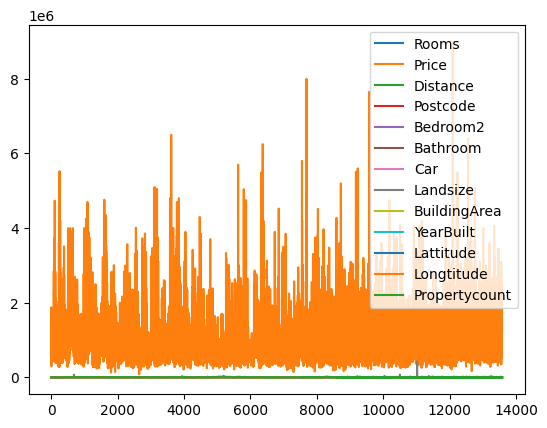

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline
dataset.plot()

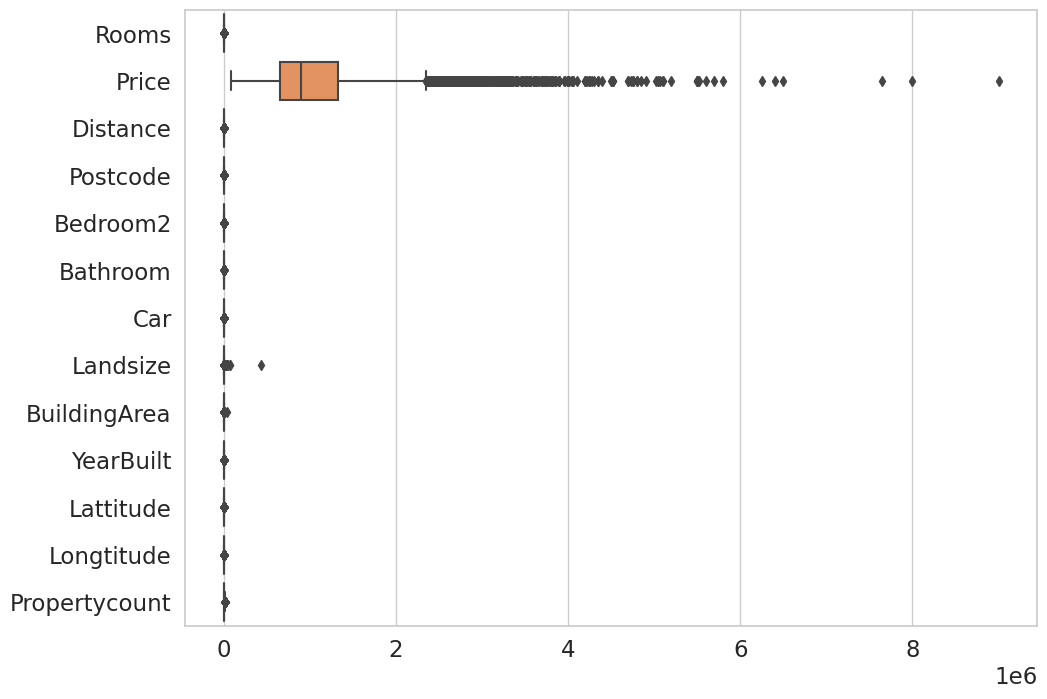

In [20]:
import seaborn as sns
%matplotlib inline

sns.set(rc={'figure.figsize':(11,8)}, font_scale=1.5, style='whitegrid')

# tips = sns.load_dataset(dataset)
sns.boxplot(data=dataset, orient="h");

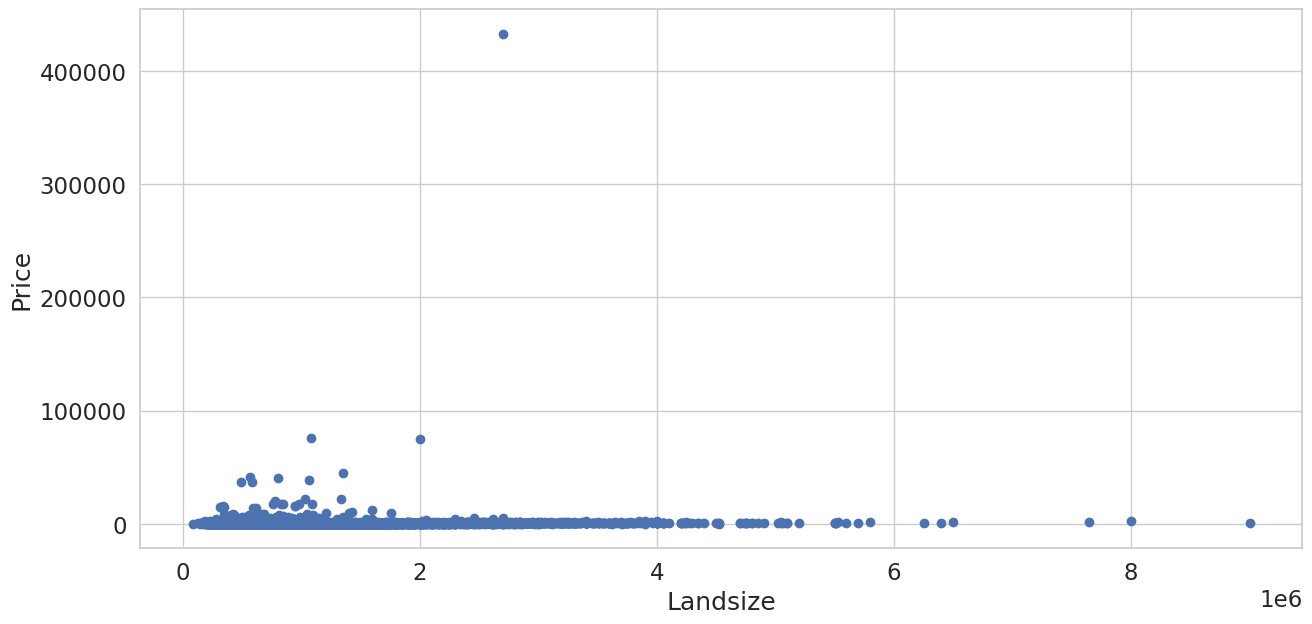

In [21]:
# Scatter plot
fig, ax = plt.subplots(figsize = (15,7))
ax.scatter(dataset['Price'], dataset['Landsize'])

# x-axis label
ax.set_xlabel('Landsize')

# y-axis label
ax.set_ylabel('Price')
plt.show()

In [22]:
import sklearn

# IQR Price
Q1 = np.percentile(dataset['Price'], 25,
                   method = 'midpoint')

Q3 = np.percentile(dataset['Price'], 75,
                   method = 'midpoint')
IQR = Q3 - Q1

print("Old Shape: ", dataset.shape)

Old Shape:  (13580, 19)


In [23]:
# Upper bound
upper = Q3 + 1.5 * IQR

# Lower bound
lower = Q1 - 1.5 * IQR

# Finding the indices of the outliers
outliers_upper = dataset[dataset['Price'] > upper].index
outliers_lower = dataset[dataset['Price'] < lower].index

# Concatenate the indices of the outliers
outliers = outliers_upper.append(outliers_lower)

# Removing the outliers
dataset.drop(outliers, inplace=True)

print("New Shape: ", dataset.shape)

New Shape:  (12968, 19)


In [24]:
import sklearn

# IQR Landsize
Q1 = np.percentile(dataset['Landsize'], 25,
                   method = 'midpoint')

Q3 = np.percentile(dataset['Landsize'], 75,
                   method = 'midpoint')
IQR = Q3 - Q1

print("Old Shape: ", dataset.shape)

Old Shape:  (12968, 19)


In [25]:
# Upper bound
upper = Q3 + 1.5 * IQR

# Lower bound
lower = Q1 - 1.5 * IQR

# Finding the indices of the outliers
outliers_upper = dataset[dataset['Landsize'] > upper].index
outliers_lower = dataset[dataset['Landsize'] < lower].index

# Concatenate the indices of the outliers
outliers = outliers_upper.append(outliers_lower)

# Removing the outliers
dataset.drop(outliers, inplace=True)

print("New Shape: ", dataset.shape)

New Shape:  (12627, 19)


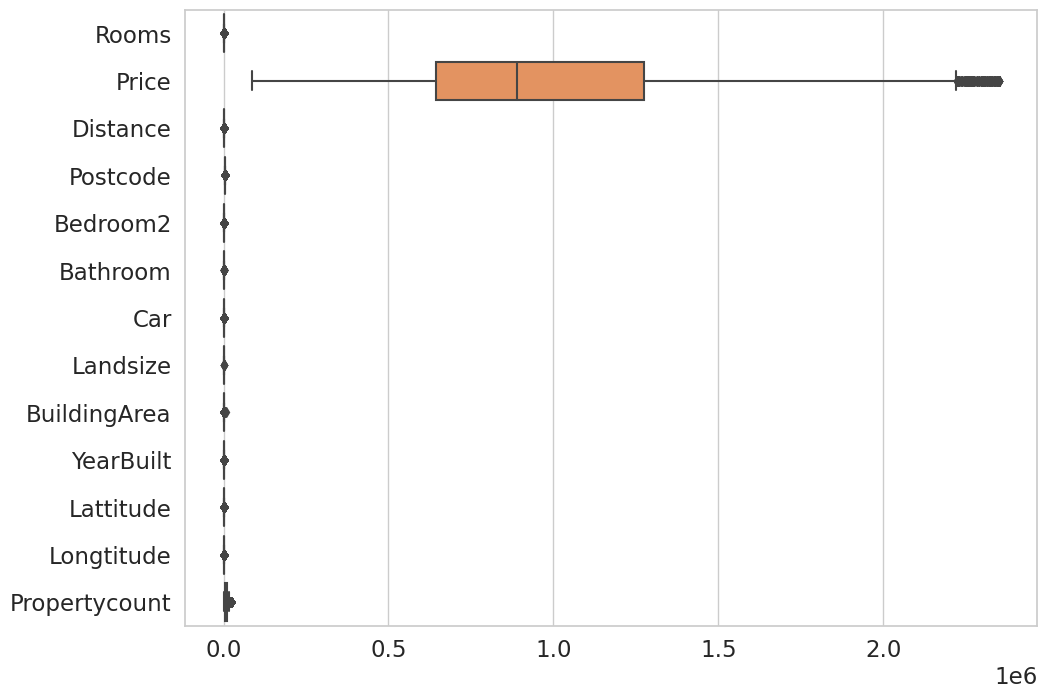

In [26]:
import seaborn as sns
%matplotlib inline

sns.set(rc={'figure.figsize':(11,8)}, font_scale=1.5, style='whitegrid')

# tips = sns.load_dataset(dataset)
sns.boxplot(data=dataset, orient="h");

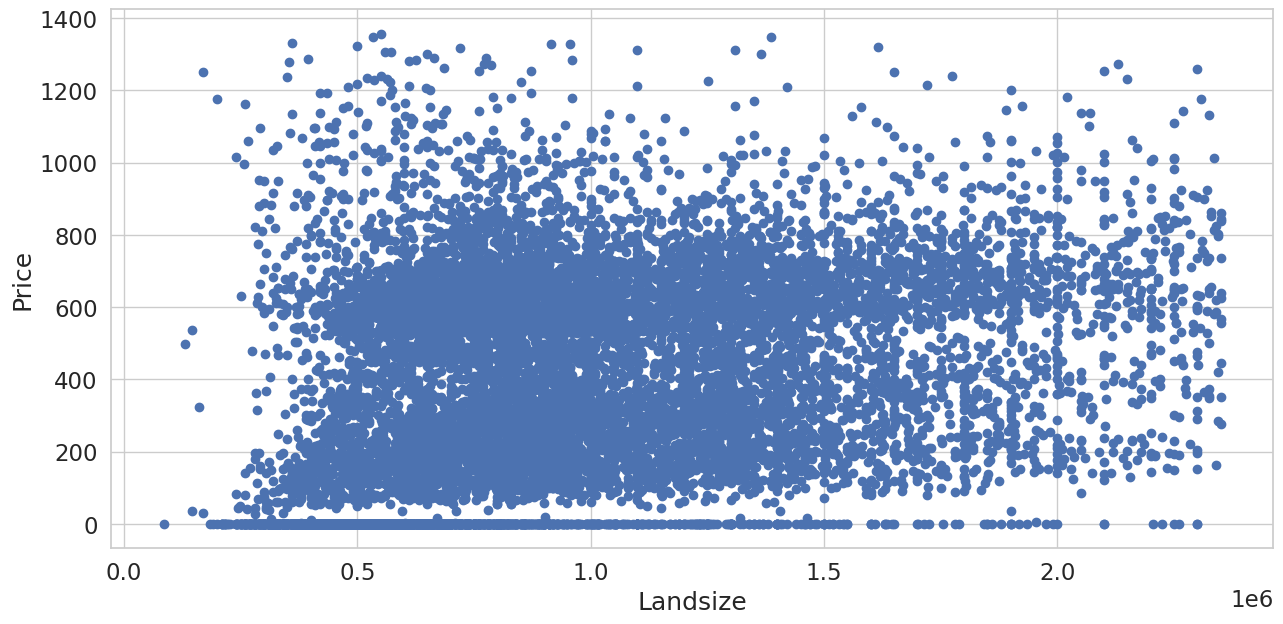

In [27]:
# Scatter plot
fig, ax = plt.subplots(figsize = (15,7))
ax.scatter(dataset['Price'], dataset['Landsize'])

# x-axis label
ax.set_xlabel('Landsize')

# y-axis label
ax.set_ylabel('Price')
plt.show()

Menampilkan distribusi data (kde - kernel density estimation)

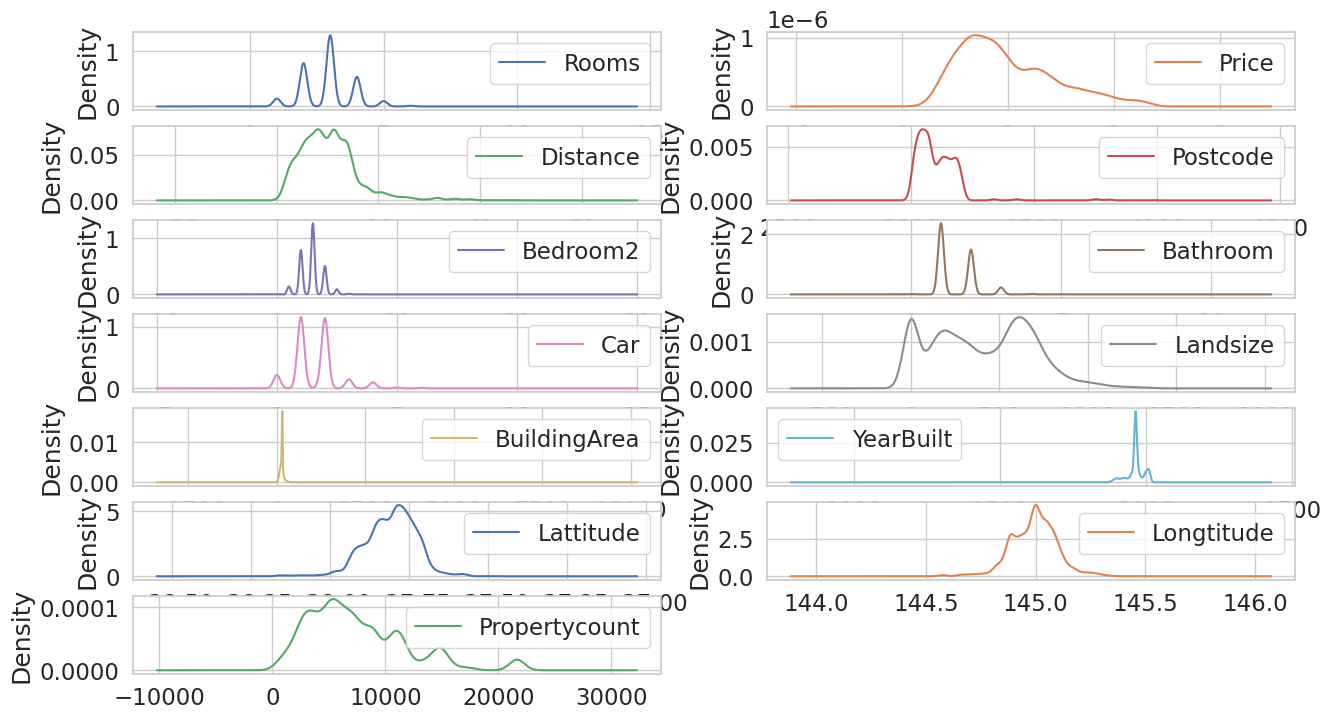

In [28]:
dataset.plot(kind='kde',subplots=True,layout=(10,2),figsize=(15,12), sharex=False)
plt.show()

Menampilkan distribusi data dalam bentuk Histogram

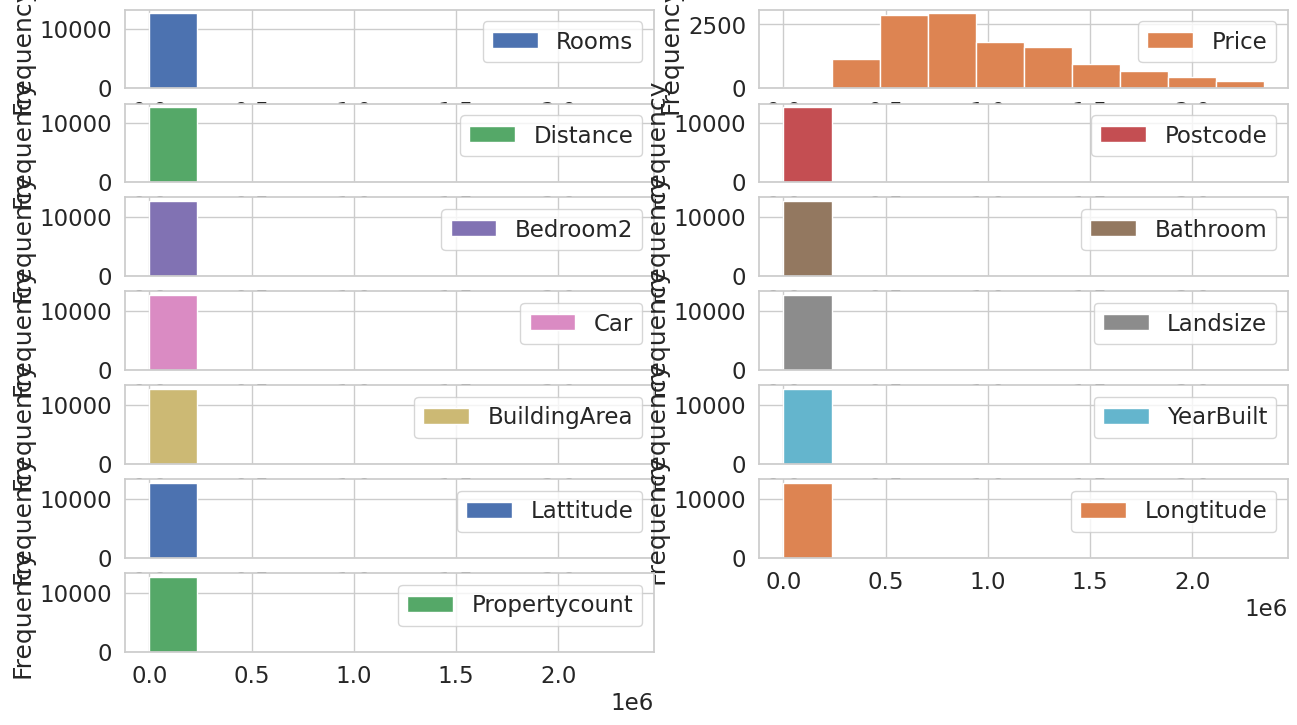

In [29]:
dataset.plot(kind='hist',subplots=True,layout=(10,2),figsize=(15,12), sharex=False)
plt.show()

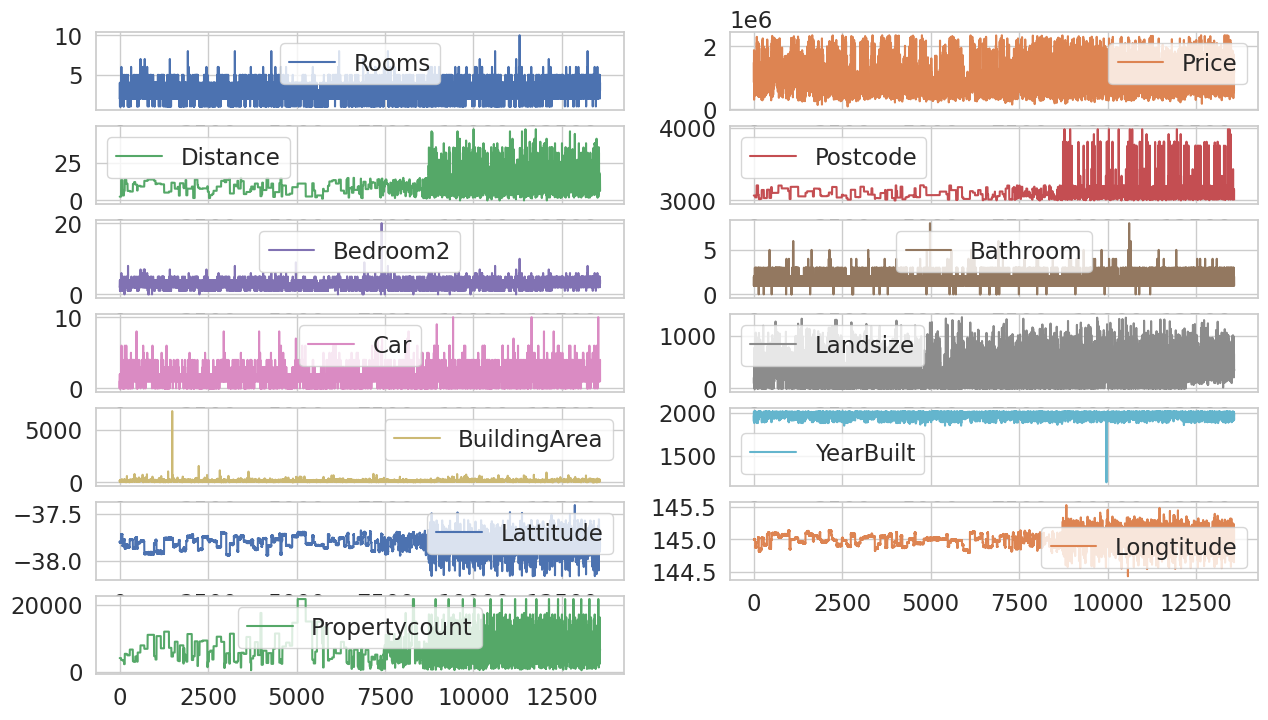

In [30]:
dataset.plot(kind='line',subplots=True,layout=(10,2),figsize=(15,12), sharex=False)
plt.show()

3.2 Corellation Matrix

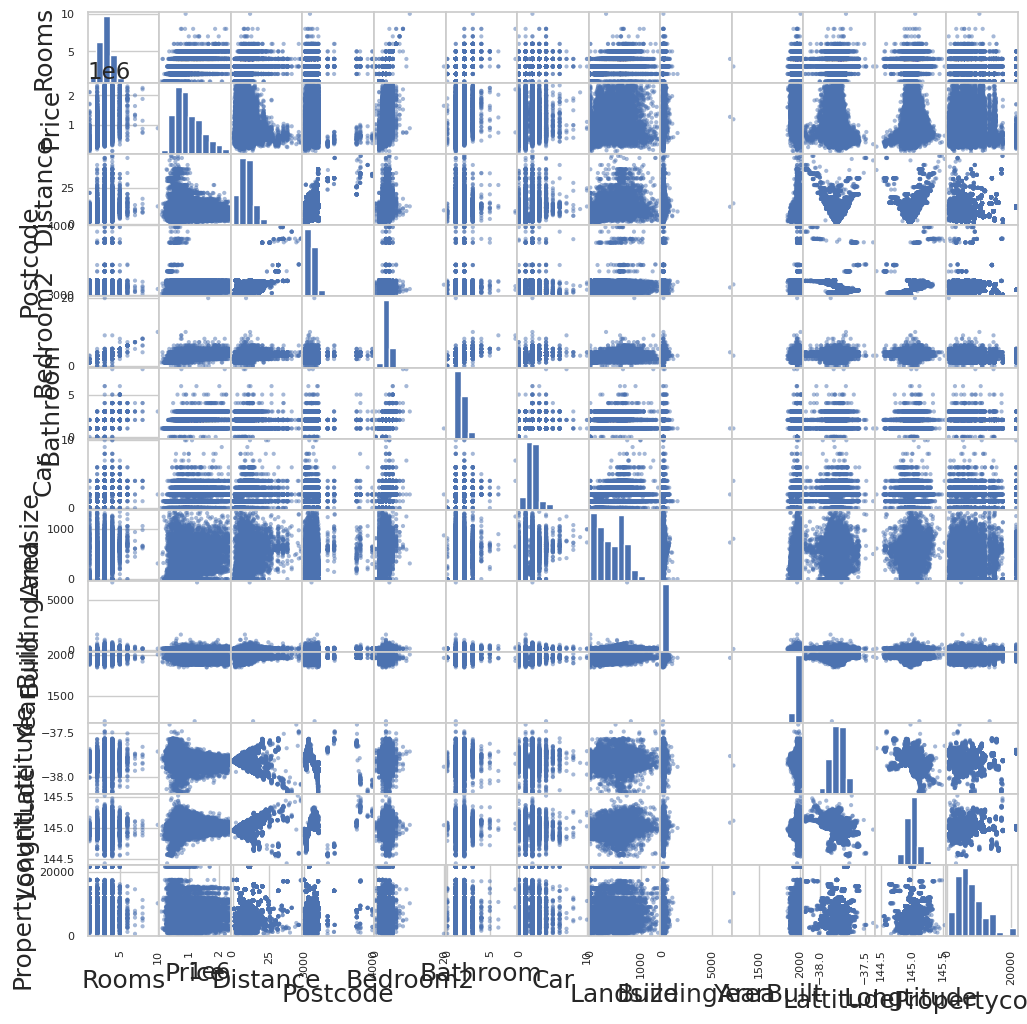

In [31]:
pd.plotting.scatter_matrix(dataset,figsize=(12,12))
plt.show()

Heatmap

<ipython-input-32-4b443a21f68f>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = corr_data.corr()


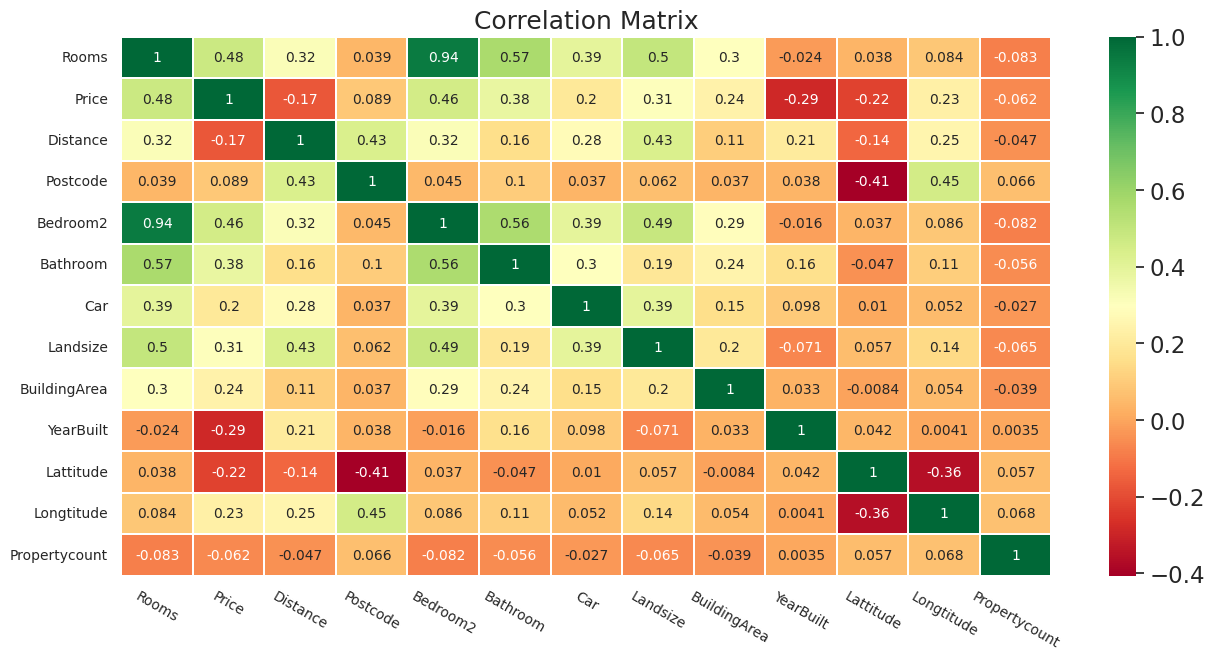

In [32]:
corr_data = dataset
corr = corr_data.corr()

cor_plot = sns.heatmap(corr,annot=True,cmap='RdYlGn',linewidths=0.2,annot_kws={'size':10})
fig=plt.gcf()
fig.set_size_inches(15,7)
plt.xticks(fontsize=10,rotation=-30)
plt.yticks(fontsize=10)
plt.title('Correlation Matrix')
plt.show()

4. SPLITTING DATA

4.1 Slicing

In [33]:
#definisi x y label
x = dataset.drop('Type', axis=1)
x

,Suburb,Address,Rooms,Price,Method,SellerG,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,1480000.0,S,Biggin,2.5,3067.0,2.0,1.0,1.0,202.0,151.96765,1964.684217,-37.79960,144.99840,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,1035000.0,S,Biggin,2.5,3067.0,2.0,1.0,0.0,156.0,79.00000,1900.000000,-37.80790,144.99340,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,1465000.0,SP,Biggin,2.5,3067.0,3.0,2.0,0.0,134.0,150.00000,1900.000000,-37.80930,144.99440,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,850000.0,PI,Biggin,2.5,3067.0,3.0,2.0,1.0,94.0,151.96765,1964.684217,-37.79690,144.99690,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,1600000.0,VB,Nelson,2.5,3067.0,3.0,1.0,2.0,120.0,142.00000,2014.000000,-37.80720,144.99410,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13574,Westmeadows,9 Black St,3,582000.0,S,Red,16.5,3049.0,3.0,2.0,2.0,256.0,151.96765,1964.684217,-37.67917,144.89390,Northern Metropolitan,2474.0
13575,Wheelers Hill,12 Strada Cr,4,1245000.0,S,Barry,16.7,3150.0,4.0,2.0,2.0,652.0,151.96765,1981.000000,-37.90562,145.16761,South-Eastern Metropolitan,7392.0
13576,Williamstown,77 Merrett Dr,3,1031000.0,SP,Williams,6.8,3016.0,3.0,2.0,2.0,333.0,133.00000,1995.000000,-37.85927,144.87904,Western Metropolitan,6380.0
13577,Williamstown,83 Power St,3,1170000.0,S,Raine,6.8,3016.0,3.0,2.0,4.0,436.0,151.96765,1997.000000,-37.85274,144.88738,Western Metropolitan,6380.0


In [34]:
#pilih fitur
y = dataset["Type"]
y

0        h
1        h
2        h
3        h
4        h
        ..
13574    h
13575    h
13576    h
13577    h
13579    h
Name: Type, Length: 12627, dtype: object

4.2 Encoding

In [36]:
#one hot encoding untuk data x
x = pd.get_dummies(x)
x

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,...,SellerG_iSell,SellerG_iTRAK,Regionname_Eastern Metropolitan,Regionname_Eastern Victoria,Regionname_Northern Metropolitan,Regionname_Northern Victoria,Regionname_South-Eastern Metropolitan,Regionname_Southern Metropolitan,Regionname_Western Metropolitan,Regionname_Western Victoria
0,2,1480000.0,2.5,3067.0,2.0,1.0,1.0,202.0,151.96765,1964.684217,...,0,0,0,0,1,0,0,0,0,0
1,2,1035000.0,2.5,3067.0,2.0,1.0,0.0,156.0,79.00000,1900.000000,...,0,0,0,0,1,0,0,0,0,0
2,3,1465000.0,2.5,3067.0,3.0,2.0,0.0,134.0,150.00000,1900.000000,...,0,0,0,0,1,0,0,0,0,0
3,3,850000.0,2.5,3067.0,3.0,2.0,1.0,94.0,151.96765,1964.684217,...,0,0,0,0,1,0,0,0,0,0
4,4,1600000.0,2.5,3067.0,3.0,1.0,2.0,120.0,142.00000,2014.000000,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13574,3,582000.0,16.5,3049.0,3.0,2.0,2.0,256.0,151.96765,1964.684217,...,0,0,0,0,1,0,0,0,0,0
13575,4,1245000.0,16.7,3150.0,4.0,2.0,2.0,652.0,151.96765,1981.000000,...,0,0,0,0,0,0,1,0,0,0
13576,3,1031000.0,6.8,3016.0,3.0,2.0,2.0,333.0,133.00000,1995.000000,...,0,0,0,0,0,0,0,0,1,0
13577,3,1170000.0,6.8,3016.0,3.0,2.0,4.0,436.0,151.96765,1997.000000,...,0,0,0,0,0,0,0,0,1,0


In [37]:
x.shape

(12627, 13041)

4.2.1 Stndarisasi

Standardisasi digunakan pada nilai data yang berdistribusi normal. Selanjutnya, dengan menerapkan standarisasi, kita cenderung menjadikan mean kumpulan data sebagai 0 dan deviasi standarnya setara dengan 1.

Artinya, dengan membakukan nilainya, kita mendapatkan statistik sebaran data sebagai berikut

mean = 0 standar deviasi = 1

Dengan demikian, kumpulan data menjadi cukup jelas dan mudah dianalisis karena meannya turun ke 0 dan kebetulan memiliki unit varians.

In [38]:
from sklearn.preprocessing import StandardScaler
std_scale = StandardScaler().fit_transform(x)
std_scale = pd.DataFrame(std_scale)

std_scale

,0,1,2,3,4,5,6,7,8,9,...,13031,13032,13033,13034,13035,13036,13037,13038,13039,13040
0,-0.977169,1.080337,-1.336187,-0.399787,-0.940403,-0.762263,-0.620854,-0.708989,0.082472,-0.010782,...,-0.029528,-0.030842,-0.35412,-0.061124,1.540616,-0.052721,-0.189338,-0.686664,-0.543699,-0.049609
1,-0.977169,0.101574,-1.336187,-0.399787,-0.940403,-0.762263,-1.678511,-0.871072,-0.797202,-2.290195,...,-0.029528,-0.030842,-0.35412,-0.061124,1.540616,-0.052721,-0.189338,-0.686664,-0.543699,-0.049609
2,0.106410,1.047345,-1.336187,-0.399787,0.128502,0.799492,-1.678511,-0.948590,0.058751,-2.290195,...,-0.029528,-0.030842,-0.35412,-0.061124,1.540616,-0.052721,-0.189338,-0.686664,-0.543699,-0.049609
3,0.106410,-0.305328,-1.336187,-0.399787,0.128502,0.799492,-0.620854,-1.089531,0.082472,-0.010782,...,-0.029528,-0.030842,-0.35412,-0.061124,1.540616,-0.052721,-0.189338,-0.686664,-0.543699,-0.049609
4,1.189989,1.344274,-1.336187,-0.399787,0.128502,-0.762263,0.436803,-0.997919,-0.037695,1.727062,...,-0.029528,-0.030842,-0.35412,-0.061124,1.540616,-0.052721,-0.189338,-0.686664,-0.543699,-0.049609
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12622,0.106410,-0.894786,1.068365,-0.597321,0.128502,0.799492,0.436803,-0.518718,0.082472,-0.010782,...,-0.029528,-0.030842,-0.35412,-0.061124,1.540616,-0.052721,-0.189338,-0.686664,-0.543699,-0.049609
12623,1.189989,0.563462,1.102715,0.511062,1.197408,0.799492,0.436803,0.876604,0.082472,0.564172,...,-0.029528,-0.030842,-0.35412,-0.061124,-0.649091,-0.052721,5.281547,-0.686664,-0.543699,-0.049609
12624,0.106410,0.092776,-0.597646,-0.959466,0.128502,0.799492,0.436803,-0.247405,-0.146196,1.057519,...,-0.029528,-0.030842,-0.35412,-0.061124,-0.649091,-0.052721,-0.189338,-0.686664,1.839253,-0.049609
12625,0.106410,0.398502,-0.597646,-0.959466,0.128502,0.799492,2.552116,0.115519,0.082472,1.127998,...,-0.029528,-0.030842,-0.35412,-0.061124,-0.649091,-0.052721,-0.189338,-0.686664,1.839253,-0.049609


4.2.2 Normalisasi

Cara untuk menormalkan fitur/variabel masukan adalah scaler Min-Max. Dengan demikian, semua fitur akan diubah ke dalam rentang [0,1] yang berarti nilai minimum dan maksimum suatu fitur/variabel masing-masing adalah 0 dan 1.

Ide utama dibalik normalisasi/standardisasi selalu sama. Variabel yang diukur pada skala yang berbeda tidak memberikan kontribusi yang sama terhadap fungsi pemasangan model & model yang dipelajari dan mungkin pada akhirnya menimbulkan bias. Oleh karena itu, untuk mengatasi potensi masalah ini, normalisasi fitur seperti MinMax Scaling biasanya digunakan sebelum pemasangan model.

In [39]:
from sklearn.preprocessing import MinMaxScaler
x = MinMaxScaler().fit_transform(x)
x = pd.DataFrame(x)

x

,0,1,2,3,4,5,6,7,8,9,...,13031,13032,13033,13034,13035,13036,13037,13038,13039,13040
0,0.111111,0.615894,0.052854,0.068577,0.10,0.125,0.1,0.148858,0.022378,0.935139,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.111111,0.419426,0.052854,0.068577,0.10,0.125,0.0,0.114959,0.011633,0.856448,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.222222,0.609272,0.052854,0.068577,0.15,0.250,0.0,0.098747,0.022088,0.856448,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.222222,0.337748,0.052854,0.068577,0.15,0.250,0.1,0.069270,0.022378,0.935139,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.333333,0.668874,0.052854,0.068577,0.15,0.125,0.2,0.088430,0.020910,0.995134,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12622,0.222222,0.219426,0.348837,0.050154,0.15,0.250,0.2,0.188651,0.022378,0.935139,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
12623,0.333333,0.512141,0.353066,0.153531,0.20,0.250,0.2,0.480472,0.022378,0.954988,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
12624,0.222222,0.417660,0.143763,0.016377,0.15,0.250,0.2,0.245394,0.019585,0.972019,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
12625,0.222222,0.479029,0.143763,0.016377,0.15,0.250,0.4,0.321297,0.022378,0.974453,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


4.3 Splitting

In [40]:
from sklearn.model_selection import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(x, y, train_size=0.8, random_state=1, stratify=y)

In [41]:
from collections import Counter
print("Train distribution", Counter(yTrain))
print("Test distribution", Counter(yTest))

Train distribution Counter({'h': 7021, 'u': 2214, 't': 866})
Test distribution Counter({'h': 1756, 'u': 553, 't': 217})


Parameter stratify ini melakukan pemisahan sehingga proporsi nilai pada sampel yang dihasilkan akan sama dengan proporsi nilai yang diberikan pada parameter stratify.

Misalnya, jika variabel y adalah variabel kategori biner dengan nilai 0 dan 1 dan terdapat 25% angka nol dan 75% angka satu, stratify=y akan memastikan bahwa pemisahan acak Anda memiliki 25% angka 0 dan 75% angka 1.

In [42]:
from sklearn.linear_model import LogisticRegression

models = []
models.append(('LR', LogisticRegression()))

In [43]:
results_c = []
names_c = []

for name, model in models:
    # define how to split off validation data ('kfold' how many folds)
    kfold = KFold(n_splits=10)
    # train the model
    cv_results = cross_val_score(model, xTrain, yTrain, cv=kfold, scoring='accuracy')
    results_c.append(cv_results)
    names_c.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

LR: 0.864568 (0.007515)


In [44]:
LR = LogisticRegression()
LR.fit(xTrain, yTrain)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [45]:
predictions = LR.predict(xTest)
print(accuracy_score(yTest, predictions))

0.8705463182897862


[[1696   11   49]
 [ 117   47   53]
 [  83   14  456]]


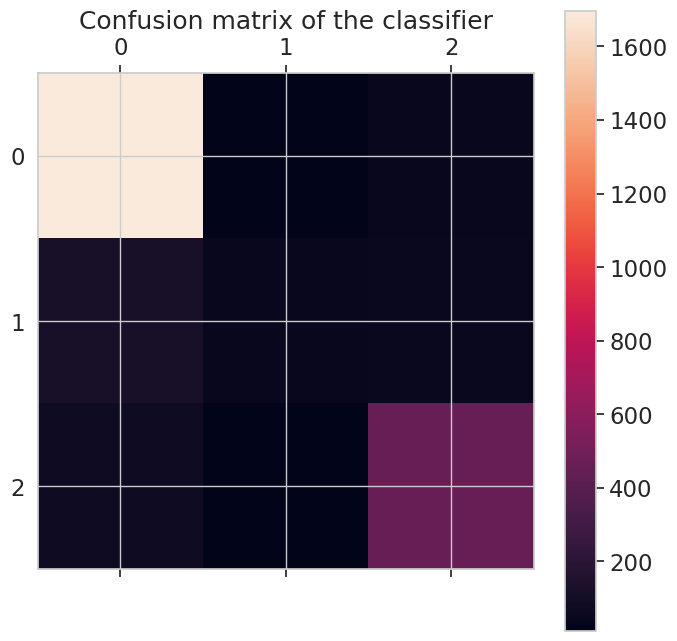

In [46]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
import pylab as pl

print(confusion_matrix(yTest, predictions))

cm = confusion_matrix(yTest, predictions)
pl.matshow(cm)
pl.title('Confusion matrix of the classifier')
pl.colorbar()
pl.show()

In [47]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(yTest, predictions))

              precision    recall  f1-score   support

           h       0.89      0.97      0.93      1756
           t       0.65      0.22      0.33       217
           u       0.82      0.82      0.82       553

    accuracy                           0.87      2526
   macro avg       0.79      0.67      0.69      2526
weighted avg       0.86      0.87      0.85      2526

